# Determining important factors that impact SAT scores 

The SAT, or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year. The SAT has three sections, each of which is worth a maximum of 800 points. Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine how demographics affect SAT scores.  Other factors such as class_size, perceivance of safety at school by students etc that could affect SAT scores are also examined to determine if they impact SAT scores.  Policy making such as allocation of funds, rebalancing ratio of races in schools etc will benefit alot from this study.

### The datasets were retrieved from data.cityofnewyork.us and are as follows:<br\>
ap_2010.csv - Data on AP test results https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e <br\>
class_size.csv - Data on class size https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3 <br\>
demographics.csv - Data on demographics https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j <br\>
graduation.csv - Data on graduation outcomes https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a <br\>
hs_directory.csv - A directory of high schools https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2 <br\>
sat_results.csv - Data on SAT scores https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4<br\>
survey_all.txt - Data on surveys from all schools https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8 <br\>
survey_d75.txt - Data on surveys from New York City district 75 https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8 <br\>


### 1) Reading and exploring the csv datasets

In [25]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Reading all csv files into a dictionary called data:
data = {}
list = ['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results']

for x in list:
    y = '../Correlations between SAT scores and Demographics/'+ x + '.csv'
    data[x] = pd.read_csv(y)

#Exploring the sat_results dataset:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


#### Observations: <br/>
1) The DBN seems like a unique identifier for each school.<br\>
2) These are all high schools. <br\>
3) Each school(DBN) is only mentioned once in this dataset.<br\>
4) "SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score" can be combined into one average score making the analysis easier.

In [26]:
#Combining the "SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score" columns:

SAT_columns = ["SAT Critical Reading Avg. Score", "SAT Math Avg. Score", "SAT Writing Avg. Score"]

for x in SAT_columns:
    data['sat_results'][x] = pd.to_numeric(data['sat_results'][x], errors='coerce')

data['sat_results']['sat_score'] = data['sat_results'][SAT_columns].sum(axis=1)
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


#### Exploring the other datasets:

In [27]:
for x in list:
    print(x)
    print(data[x].head())

ap_2010
      DBN                             SchoolName  AP Test Takers   Total Exams Taken  Number of Exams with scores 3 4 or 5
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0                                  10.0
1  01M450                 EAST SIDE COMMUNITY HS             19.0               21.0                                   NaN
2  01M515                    LOWER EASTSIDE PREP             24.0               26.0                                  24.0
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0              377.0                                 191.0
4  02M296  High School of Hospitality Management              NaN                NaN                                   NaN
class_size
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY) SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  AVERAGE CLAS

In [28]:
data['hs_directory'] = data["hs_directory"].rename({'dbn':'DBN'}, axis='columns')

#### Observations:

1) The following datasets: ap_2010, demographics, graduation and hs_directory contain the "DBN" column which allows the datasets to be combined with the sat_results dataset.<br\>
2) The class_size dataset has columns "CSD" and "SCHOOL CODE" from which the "DBN" can be derived.<br\>
3) The "Location 1" column in hs_directory allows mapping of the schools to be done.  

#### Combining "CSD" column and "SCHOOL CODE" column to form "DBN" column for the class_size dataset.

In [29]:
#1) Turning the "CSD" column from 1 digit to 2 digits:
new_csd = []
for x in data["class_size"]["CSD"]:
    x = str(x)
    if len(x) == 1:
        x = '0'+ x
    new_csd.append(x)

data["class_size"]["CSD"] = new_csd

#2) Performing the combination of "CSD" & "SCHOOL CODE" to form the new "DBN" column:
data["class_size"]["DBN"]= data["class_size"]["CSD"] + data["class_size"]["SCHOOL CODE"]
print(data["class_size"]["DBN"])

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
5        01M015
6        01M015
7        01M015
8        01M015
9        01M015
10       01M015
11       01M015
12       01M019
13       01M019
14       01M019
15       01M019
16       01M019
17       01M019
18       01M019
19       01M019
20       01M019
21       01M019
22       01M019
23       01M019
24       01M019
25       01M020
26       01M020
27       01M020
28       01M020
29       01M020
30       01M020
31       01M020
32       01M020
33       01M020
34       01M020
35       01M020
36       01M020
37       01M020
38       01M020
39       01M034
40       01M064
41       01M034
42       01M034
43       01M034
44       01M034
45       01M034
46       01M034
47       01M034
48       01M034
49       01M034
50       01M034
51       01M034
52       01M034
53       01M034
54       01M034
55       01M034
56       01M034
57       01M034
58       01M034
59       01M034
60       01M034
61       01M034
62      

#### Extracting the latitudes and longitudes from the "Location 1" column and adding "lat" and "lon" columns to the hs_directory dataset corresponding to latitudes and longitudes for mapping later.

In [30]:
import re
pattern = r"(\(.+\))"

data['hs_directory']['lat'] = data['hs_directory']['Location 1'].str.extract(pat=pattern)
data['hs_directory']['lat'] = data['hs_directory']['lat'].str.replace('(','')
data['hs_directory']['lat'] = data['hs_directory']['lat'].str.replace(')','')
data['hs_directory']['lat'] = data['hs_directory']['lat'].str.strip()
data['hs_directory']['lat'] = data['hs_directory']['lat'].str.split(',')
data['hs_directory']['lon'] = data['hs_directory']['lat'].str[1]
data['hs_directory']['lat'] = data['hs_directory']['lat'].str[0]
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'], errors='coerce')
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'], errors='coerce')
data['hs_directory'].head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,"B1, B4, B64, B82",D to Bay 50th St ; F to Ave X ; N to Gravesend...,50 Avenue X,Brooklyn,NY,11223,http://johndeweyhighschool.org,1937.0,NaN,NaN,We offer an innovative form of education that ...,"Computer Science Institute, Medical & Health P...","Chinese, French, Italian, Russian, Spanish","Art History, Biology, Calculus AB, Calculus BC...",NaN,NaN,"Anime, Asian-American, ASPIRA of New York Lead...","Basketball, Cross Country, Football, Outdoor T...","Basketball, Cross Country, Football, Outdoor T...",NaN,We also offer a variety of after-school sports...,Jewish Board of Family and Children’s Services...,"Coney Island Hospital Center, JASA Scheuer Hou...","Kingsborough Community College, Medgar Evers C...","Theatre Development Fund (TDF), Center for Art...","National Academy Foundation (NAF), Prospect Pa...",NaN,"Citigroup, Ernst & Young , Federal Reserve Ban...",National Aeronautics Space Administration (NAS...,Community Service Requirement,NaN,8:13 AM,3:05 PM,This school will provide students with disabil...,ESL; Transitional Bilingual Program: Chinese,Not Functionally Accessible,8,Priority to Brooklyn students or residents,Then to New York City residents,For K56B only: Open only to students whose hom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend ...,40.589238,-73.981747
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,"B103, B45, B57, B61, B62, B63, B65","A, C to Hoyt & Schermerhorn ; F, G to Bergen St",284 Baltic Street,Brooklyn,NY,11201,www.mybsgs.com,275.0,NaN,Consortium School,"At The Brooklyn School for Global Studies, all...",ILearn NYC and iZone School (Online Blended Le...,Spanish,"Art History, Calculus AB, English Language and...","Art History, Calculus AB","Arabic, Bengali, Chinese, Chinese (Cantonese),...","Academic Enrichment, Cheerleading, Art Classes...","Basketball, Volleyball","Basketball, Volleyball",NaN,"Rugby, Cheerleading",Catholic Charities Out of School Time (OST) Hi...,SUNY Downstate School-Based Health Clinic,Young Women’s Leadership Network: College Boun...,Palazzo Strozzi Renaissance Award Essay Compet...,NaN,NaN,NaN,NaN,"Saturday School Test Prep, Dedicated 9th Grade...","Extended Day Program, Uniform Required",8:45 AM,3:10 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to continuing 8th graders,"Then to Districts 13, 14, 15 and 16 students o...",Then to Brooklyn students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685...",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,40.685452,-73.993491
2,24Q530,International High School at LaGuardia Communi...,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,"B24, Q100, Q101, Q102, Q32, Q39, Q60, Q67","7 to Rawson St-33rd St ; E, M, R to Queens Plaza",45-35 Van Dam Street,Long Island City,NY,11101,www.ihsnyc.org,

### 2) Reading and exploring the txt datasets

The survey_all.txt and survey_d75.txt are tab delimeted and Windows-1252 encoded.

In [31]:
all_survey = pd.read_csv('../Correlations between SAT scores and Demographics/survey_all.txt', delimiter = "\t", encoding ='windows-1252')
all_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q2h,p_q7a,p_q7b,p_q7c,p_q7d,p_q8a,p_q8b,p_q8c,p_q8d,p_q8e,p_q8f,p_q2b,p_q2d,p_q2e,p_q2f,p_q2g,p_q3a,p_q3b,p_q4b,p_q4c,p_q11c,p_q2a,p_q2c,p_q3c,p_q6a,p_q6b,p_q11d,p_q11e,p_q5,p_q4a,p_q4d,p_q4e,p_q11a,p_q11b,p_q11f,p_q1,p_q3d,p_q9,p_q10,p_q12aa,p_q12ab,p_q12ac,p_q12ad,p_q12ba,p_q12bb,p_q12bc,p_q12bd,p_q1_1,p_q1_2,p_q1_3,p_q1_4,p_q1_5,p_q1_6,p_q1_7,p_q1_8,p_q1_9,p_q1_10,p_q1_11,p_q1_12,p_q1_13,p_q1_14,p_q2a_1,p_q2a_2,p_q2a_3,p_q2a_4,p_q2a_5,p_q2b_1,p_q2b_2,p_q2b_3,p_q2b_4,p_q2b_5,p_q2c_1,p_q2c_2,p_q2c_3,p_q2c_4,p_q2c_5,p_q2d_1,p_q2d_2,p_q2d_3,p_q2d_4,p_q2d_5,p_q2e_1,p_q2e_2,p_q2e_3,p_q2e_4,p_q2e_5,p_q2f_1,p_q2f_2,p_q2f_3,p_q2f_4,p_q2f_5,p_q2g_1,p_q2g_2,p_q2g_3,p_q2g_4,p_q2g_5,p_q2h_1,p_q2h_2,p_q2h_3,p_q2h_4,p_q2h_5,p_q3a_1,p_q3a_2,p_q3a_3,p_q3a_4,p_q3a_5,p_q3b_1,p_q3b_2,p_q3b_3,p_q3b_4,p_q3b_5,p_q3c_1,p_q3c_2,p_q3c_3,p_q3c_4,p_q3c_5,p_q3d_1,p_q3d_2,p_q3d_3,p_q3d_4,p_q3d_5,p_q4a_1,p_q4a_2,p_q4a_3,p_q4a_4,p_q4a_5,p_q4b_1,p_q4b_2,p_q4b_3,p_q4b_4,p_q4b_5,p_q4c_1,p_q4c_2,p_q4c_3,p_q4c_4,p_q4c_5,p_q4d_1,p_q4d_2,p_q4d_3,p_q4d_4,p_q4d_5,p_q4e_1,p_q4e_2,p_q4e_3,p_q4e_4,p_q4e_5,p_q5a,p_q5b,p_q5c,p_q5d,p_q5e,p_q5f,p_q5g,p_q5h,p_q5i,p_q5j,p_q6a_1,p_q6a_2,p_q6a_3,p_q6a_4,p_q6a_5,p_q6b_1,p_q6b_2,p_q6b_3,p_q6b_4,p_q6b_5,p_q7a_1,p_q7a_2,p_q7a_3,p_q7a_4,p_q7a_5,p_q7b_1,p_q7b_2,p_q7b_3,p_q7b_4,p_q7b_5,p_q7c_1,p_q7c_2,p_q7c_3,p_q7c_4,p_q7c_5,p_q7d_1,p_q7d_2,p_q7d_3,p_q7d_4,p_q7d_5,p_q8a_1,p_q8a_2,p_q8a_3,p_q8a_4,p_q8a_5,p_q8b_1,p_q8b_2,p_q8b_3,p_q8b_4,p_q8b_5,p_q8c_1,p_q8c_2,p_q8c_3,p_q8c_4,p_q8c_5,p_q8d_1,p_q8d_2,p_q8d_3,p_q8d_4,p_q8d_5,p_q8e_1,p_q8e_2,p_q8e_3,p_q8e_4,p_q8e_5,p_q8f_1,p_q8f_2,p_q8f_3,p_q8f_4,p_q8f_5,p_q9_1,p_q9_2,...,s_N_q2a_3,s_N_q2a_4,s_N_q2b_1,s_N_q2b_2,s_N_q2b_3,s_N_q2b_4,s_N_q2c_1,s_N_q2c_2,s_N_q2c_3,s_N_q2c_4,s_N_q3a_1,s_N_q3a_2,s_N_q3a_3,s_N_q3a_4,s_N_q3b_1,s_N_q3b_2,s_N_q3b_3,s_N_q3b_4,s_N_q3c_1,s_N_q3c_2,s_N_q3c_3,s_N_q3c_4,s_N_q3d_1,s_N_q3d_2,s_N_q3d_3,s_N_q3d_4,s_N_q3e_1,s_N_q3e_2,s_N_q3e_3,s_N_q3e_4,s_N_q3f_1,s_N_q3f_2,s_N_q3f_3,s_N_q3f_4,s_N_q3g_1,s_N_q3g_2,s_N_q3g_3,s_N_q3g_4,s_N_q3h_1,s_N_q3h_2,s_N_q3h_3,s_N_q3h_4,s_N_q3i_1,s_N_q3i_2,s_N_q3i_3,s_N_q3i_4,s_N_q4a_1,s_N_q4a_2,s_N_q4a_3,s_N_q4a_4,s_N_q4b_1,s_N_q4b_2,s_N_q4b_3,s_N_q4b_4,s_N_q5a_1,s_N_q5a_2,s_N_q5a_3,s_N_q5a_4,s_N_q5b_1,s_N_q5b_2,s_N_q5b_3,s_N_q5b_4,s_N_q6a_1,s_N_q6a_2,s_N_q6a_3,s_N_q6a_4,s_N_q6a_5,s_N_q6b_1,s_N_q6b_2,s_N_q6b_3,s_N_q6b_4,s_N_q6b_5,s_N_q6c_1,s_N_q6c_2,s_N_q6c_3,s_N_q6c_4,s_N_q6c_5,s_N_q6d_1,s_N_q6d_2,s_N_q6d_3,s_N_q6d_4,s_N_q6d_5,s_N_q6e_1,s_N_q6e_2,s_N_q6e_3,s_N_q6e_4,s_N_q6e_5,s_N_q6f_1,s_N_q6f_2,s_N_q6f_3,s_N_q6f_4,s_N_q6f_5,s_N_q6g_1,s_N_q6g_2,s_N_q6g_3,s_N_q6g_4,s_N_q6g_5,s_N_q6h_1,s_N_q6h_2,s_N_q6h_3,s_N_q6h_4,s_N_q6h_5,s_N_q7a_1,s_N_q7a_2,s_N_q7a_3,s_N_q7a_4,s_N_q7b_1,s_N_q7b_2,s_N_q7b_3,s_N_q7b_4,s_N_q8a_1,s_N_q8a_2,s_N_q8a_3,s_N_q8a_4,s_N_q8a_5,s_N_q8b_1,s_N_q8b_2,s_N_q8b_3,s_N_q8b_4,s_N_q8b_5,s_N_q8c_1,s_N_q8c_2,s_N_q8c_3,s_N_q8c_4,s_N_q8c_5,s_N_q8d_1,s_N_q8d_2,s_N_q8d_3,s_N_q8d_4,s_N_q8d_5,s_N_q9a_1,s_N_q9a_2,s_N_q9a_3,s_N_q9b_1,s_N_q9b_2,s_N_q9b_3,s_N_q9c_1,s_N_q9c_2,s_N_q9c_3,s_N_q9d_1,s_N_q9d_2,s_N_q9d_3,s_N_q9e_1,s_N_q9e_2,s_N_q9e_3,s_N_q9f_1,s_N_q9f_2,s_N_q9f_3,s_N_q9g_1,s_N_q9g_2,s_N_q9g_3,s_N_q9h_1,s_N_q9h_2,s_N_q9h_3,s_N_q10a_1,s_N_q10a_2,s_N_q10a_3,s_N_q10b_1,s_N_q10b_2,s_N_q10b_3,s_N_q10c_1,s_N_q10c_2,s_N_q10c_3,s_N_q10d_1,s_N_q10d_2,s_N_q10d_3,s_N_q10e_1,s_N_q10e_2,s_N_q10e_3,s_N_q10f_1,s_N_q10f_2,s_N_q10f_3,s_N_q10g_1,s_N_q10g_2,s_N_q10g_3,s_N_q10h_1,s_N_q10h_2,s_N_q10h_3,s_N_q11_1,s_N_q11_2,s_N_q11_3,s_N_q11_4,s_N_q12a_1,s_N_q12a_2,s_N_q12a_3,s_N_q12a_4,s_N_q12b_1,s_N_q12b_2,s_N_q12b_3,s_N_q12b_4,s_N_q12c_1,s_N_q12c_2,s_N_q12c_3,s_N_q12c_4,s_N_q13a_1,s_N_q13a_2,s_N_q13a_3,s_N_q13a_4,s_N_q13b_1,s_N_q13b_2,s_N_q13b_3,s_N_q13b_4,s_N_q13c_1,s_N_q13c_2,s_N_q13c_3,s_N_q

In [32]:
d75_survey = pd.read_csv('../Correlations between SAT scores and Demographics/survey_d75.txt', delimiter = "\t", encoding ='windows-1252')
d75_survey.head()

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,N_s,N_t,N_p,nr_s,nr_t,nr_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,p_q1c,p_q10a,p_q10b,p_q10c,p_q10d,p_q10e,p_q10f,p_q11a,p_q11b,p_q11c,p_q11d,p_q11e,p_q1b,p_q1e,p_q1f,p_q2a,p_q2b,p_q3c,p_q3d,p_q4a,p_q6c,p_q12c,p_q1a,p_q1d,p_q3a,p_q3b,p_q3e,p_q4b,p_q4c,p_q6e,p_q7,p_q8a,p_q8b,p_q12d,p_q1g,p_q6a,p_q6b,p_q6d,p_q6f,p_q6g,p_q6h,p_q12a,p_q12b,p_q12e,p_q12f,p_q5,p_q9,p_q13a,p_q13b,p_q13c,p_q13d,p_q14a,p_q14b,p_q14c,p_q14d,p_q1a_1,p_q1a_2,p_q1a_3,p_q1a_4,p_q1a_5,p_q1b_1,p_q1b_2,p_q1b_3,p_q1b_4,p_q1b_5,p_q1c_1,p_q1c_2,p_q1c_3,p_q1c_4,p_q1c_5,p_q1d_1,p_q1d_2,p_q1d_3,p_q1d_4,p_q1d_5,p_q1e_1,p_q1e_2,p_q1e_3,p_q1e_4,p_q1e_5,p_q1f_1,p_q1f_2,p_q1f_3,p_q1f_4,p_q1f_5,p_q1g_1,p_q1g_2,p_q1g_3,p_q1g_4,p_q1g_5,p_q2a_1,p_q2a_2,p_q2a_3,p_q2a_4,p_q2a_5,p_q2b_1,p_q2b_2,p_q2b_3,p_q2b_4,p_q2b_5,p_q3a_1,p_q3a_2,p_q3a_3,p_q3a_4,p_q3a_5,p_q3b_1,p_q3b_2,p_q3b_3,p_q3b_4,p_q3b_5,p_q3c_1,p_q3c_2,p_q3c_3,p_q3c_4,p_q3c_5,p_q3d_1,p_q3d_2,p_q3d_3,p_q3d_4,p_q3d_5,p_q3e_1,p_q3e_2,p_q3e_3,p_q3e_4,p_q3e_5,p_q4a_1,p_q4a_2,p_q4a_3,p_q4a_4,p_q4a_5,p_q4b_1,p_q4b_2,p_q4b_3,p_q4b_4,p_q4b_5,p_q4c_1,p_q4c_2,p_q4c_3,p_q4c_4,p_q4c_5,p_q5a,p_q5b,p_q5c,p_q5d,p_q5e,p_q5f,p_q5g,p_q5h,p_q5i,p_q5j,p_q5k,p_q5l,p_q5m,p_q5n,p_q6a_1,p_q6a_2,p_q6a_3,p_q6a_4,p_q6a_5,p_q6b_1,p_q6b_2,p_q6b_3,p_q6b_4,p_q6b_5,p_q6c_1,p_q6c_2,p_q6c_3,p_q6c_4,p_q6c_5,p_q6d_1,p_q6d_2,p_q6d_3,p_q6d_4,p_q6d_5,p_q6e_1,p_q6e_2,p_q6e_3,p_q6e_4,p_q6e_5,p_q6f_1,p_q6f_2,p_q6f_3,p_q6f_4,p_q6f_5,p_q6g_1,p_q6g_2,p_q6g_3,p_q6g_4,p_q6g_5,p_q6h_1,p_q6h_2,p_q6h_3,p_q6h_4,p_q6h_5,p_q7a,p_q7b,p_q7c,p_q7d,p_q7e,p_q7f,p_q7g,p_q7h,p_q7i,p_q7j,p_q7k,p_q7l,p_q7m,p_q7n,p_q8a_1,p_q8a_2,p_q8a_3,p_q8a_4,p_q8a_5,p_q8b_1,p_q8b_2,p_q8b_3,p_q8b_4,p_q8b_5,...,s_q2d_1,s_q2d_2,s_q2d_3,s_q2d_4,s_q2e_1,s_q2e_2,s_q2e_3,s_q2e_4,s_q2f_1,s_q2f_2,s_q2f_3,s_q2f_4,s_q2g_1,s_q2g_2,s_q2g_3,s_q2g_4,s_q3a_1,s_q3a_2,s_q3a_3,s_q3a_4,s_q3b_1,s_q3b_2,s_q3b_3,s_q3b_4,s_q4a_1,s_q4a_2,s_q4a_3,s_q4a_4,s_q4b_1,s_q4b_2,s_q4b_3,s_q4b_4,s_q5a_1,s_q5a_2,s_q5a_3,s_q5a_4,s_q5a_5,s_q5b_1,s_q5b_2,s_q5b_3,s_q5b_4,s_q5b_5,s_q5c_1,s_q5c_2,s_q5c_3,s_q5c_4,s_q5c_5,s_q5d_1,s_q5d_2,s_q5d_3,s_q5d_4,s_q5d_5,s_q5e_1,s_q5e_2,s_q5e_3,s_q5e_4,s_q5e_5,s_q5f_1,s_q5f_2,s_q5f_3,s_q5f_4,s_q5f_5,s_q5g_1,s_q5g_2,s_q5g_3,s_q5g_4,s_q5g_5,s_q6a_1,s_q6a_2,s_q6a_3,s_q6a_4,s_q6b_1,s_q6b_2,s_q6b_3,s_q6b_4,s_q7a_1,s_q7a_2,s_q7a_3,s_q7a_4,s_q7a_5,s_q7b_1,s_q7b_2,s_q7b_3,s_q7b_4,s_q7b_5,s_q7c_1,s_q7c_2,s_q7c_3,s_q7c_4,s_q7c_5,s_q7d_1,s_q7d_2,s_q7d_3,s_q7d_4,s_q7d_5,s_q8a_1,s_q8a_2,s_q8a_3,s_q8b_1,s_q8b_2,s_q8b_3,s_q8c_1,s_q8c_2,s_q8c_3,s_q8d_1,s_q8d_2,s_q8d_3,s_q8e_1,s_q8e_2,s_q8e_3,s_q8f_1,s_q8f_2,s_q8f_3,s_q8g_1,s_q8g_2,s_q8g_3,s_q8h_1,s_q8h_2,s_q8h_3,s_q8i_1,s_q8i_2,s_q8i_3,s_q8j_1,s_q8j_2,s_q8j_3,s_q8k_1,s_q8k_2,s_q8k_3,s_q8l_1,s_q8l_2,s_q8l_3,s_q9a_1,s_q9a_2,s_q9a_3,s_q9b_1,s_q9b_2,s_q9b_3,s_q9c_1,s_q9c_2,s_q9c_3,s_q9d_1,s_q9d_2,s_q9d_3,s_q9e_1,s_q9e_2,s_q9e_3,s_q9f_1,s_q9f_2,s_q9f_3,s_q9g_1,s_q9g_2,s_q9g_3,s_q9h_1,s_q9h_2,s_q9h_3,s_q9i_1,s_q9i_2,s_q9i_3,s_q9j_1,s_q9j_2,s_q9j_3,s_q9k_1,s_q9k_2,s_q9k_3,s_q9l_1,s_q9l_2,s_q9l_3,s_q10_1,s_q10_2,s_q10_3,s_q10_4,s_q11a_1,s_q11a_2,s_q11a_3,s_q11a_4,s_q11b_1,s_q11b_2,s_q11b_3,s_q11b_4,s_q11c_1,s_q11c_2,s_q11c_3,s_q11c_4,s_q12a_1,s_q12a_2,s_q12a_3,s_q12a_4,s_q12b_1,s_q12b_2,s_q12b_3,s_q12b_4,s_q12c_1,s_q12c_2,s_q12c_3,s_q12c_4,s_q12d_1,s_q12d_2,s_q12d_3,s_q12d_4,s_q12e_1,s_q12e_2,s_q12e_3,s_q12e_4,s_q12f_1,s_q12f_2,s_q12f_3,s_q12f_4,s_q12g_1,s_q12g_2,s_q12g_3,s_q12g_4,s_q13a_1,s_q13a_2,s_q13a_3,s_q13a_4,s_q13b_1,s_q13b_2,s_q13b_3,s_q13b_4,s_q13c_1,s_q13c_2,s_q13c_3,s_q13c_4,s_q13d_1,s_q13d_2,s_q13d_3,s_q13d_4,s_q13e_1,s_q13e_2,s_q13e_3,s_q13e_4,s_q13f_1,s_q13f_2,s_q13f_3,s_q13f_4,s_q13g_1,s_q13g_2,s_q13g_3,s_q13g_4,s_q14_1,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,9

Since both datasets(d75_survey and survey_all) are similar and contain many common columns i.e probably different schools being surveyed similarly, it makes sense to combine these 2 datasets into a common dataset called survey.

In [33]:
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,com_t_11,com_tot_11,d75,dbn,eng_p_11,eng_s_11,eng_t_11,eng_tot_11,highschool,nr_p,nr_s,nr_t,p_N_q10a,p_N_q10a_1,p_N_q10a_2,p_N_q10a_3,p_N_q10a_4,p_N_q10a_5,p_N_q10b,p_N_q10b_1,p_N_q10b_2,p_N_q10b_3,p_N_q10b_4,p_N_q10b_5,p_N_q10c,p_N_q10c_1,p_N_q10c_2,p_N_q10c_3,p_N_q10c_4,p_N_q10c_5,p_N_q10d,p_N_q10d_1,p_N_q10d_2,p_N_q10d_3,p_N_q10d_4,p_N_q10d_5,p_N_q10e,p_N_q10e_1,p_N_q10e_2,p_N_q10e_3,p_N_q10e_4,p_N_q10e_5,p_N_q10f,p_N_q10f_1,p_N_q10f_2,p_N_q10f_3,p_N_q10f_4,p_N_q10f_5,p_N_q10g,p_N_q10h,p_N_q10i,p_N_q10j,p_N_q10k,p_N_q10l,p_N_q11a_1,p_N_q11a_2,p_N_q11a_3,p_N_q11a_4,p_N_q11a_5,p_N_q11b_1,p_N_q11b_2,p_N_q11b_3,p_N_q11b_4,p_N_q11b_5,p_N_q11c_1,p_N_q11c_2,p_N_q11c_3,p_N_q11c_4,p_N_q11c_5,p_N_q11d_1,p_N_q11d_2,p_N_q11d_3,p_N_q11d_4,p_N_q11d_5,p_N_q11e_1,p_N_q11e_2,p_N_q11e_3,p_N_q11e_4,p_N_q11e_5,p_N_q11f_1,p_N_q11f_2,p_N_q11f_3,p_N_q11f_4,p_N_q12a_1,p_N_q12a_2,p_N_q12a_3,p_N_q12a_4,p_N_q12aa_1,p_N_q12aa_2,p_N_q12aa_3,p_N_q12aa_4,p_N_q12aa_5,p_N_q12ab_1,p_N_q12ab_2,p_N_q12ab_3,p_N_q12ab_4,p_N_q12ab_5,p_N_q12ac_1,p_N_q12ac_2,p_N_q12ac_3,p_N_q12ac_4,p_N_q12ac_5,p_N_q12ad_1,p_N_q12ad_2,p_N_q12ad_3,p_N_q12ad_4,p_N_q12ad_5,p_N_q12b_1,p_N_q12b_2,p_N_q12b_3,p_N_q12b_4,p_N_q12ba_1,p_N_q12ba_2,p_N_q12ba_3,p_N_q12ba_4,p_N_q12ba_5,p_N_q12bb_1,p_N_q12bb_2,p_N_q12bb_3,p_N_q12bb_4,p_N_q12bb_5,p_N_q12bc_1,p_N_q12bc_2,p_N_q12bc_3,p_N_q12bc_4,p_N_q12bc_5,p_N_q12bd_1,p_N_q12bd_2,p_N_q12bd_3,p_N_q12bd_4,p_N_q12bd_5,p_N_q12c_1,p_N_q12c_2,p_N_q12c_3,p_N_q12c_4,p_N_q12d_1,p_N_q12d_2,p_N_q12d_3,p_N_q12d_4,p_N_q12e_1,p_N_q12e_2,p_N_q12e_3,p_N_q12e_4,p_N_q12f_1,p_N_q12f_2,p_N_q12f_3,p_N_q12f_4,p_N_q13a_1,p_N_q13a_2,p_N_q13a_3,p_N_q13a_4,p_N_q13a_5,p_N_q13b_1,p_N_q13b_2,p_N_q13b_3,p_N_q13b_4,p_N_q13b_5,p_N_q13c_1,p_N_q13c_2,p_N_q13c_3,p_N_q13c_4,p_N_q13c_5,p_N_q13d_1,p_N_q13d_2,p_N_q13d_3,p_N_q13d_4,p_N_q13d_5,p_N_q14a_1,p_N_q14a_2,p_N_q14a_3,p_N_q14a_4,p_N_q14a_5,p_N_q14b_1,p_N_q14b_2,p_N_q14b_3,p_N_q14b_4,p_N_q14b_5,p_N_q14c_1,p_N_q14c_2,p_N_q14c_3,p_N_q14c_4,p_N_q14c_5,p_N_q14d_1,p_N_q14d_2,p_N_q14d_3,p_N_q14d_4,p_N_q14d_5,p_N_q1_1,p_N_q1_10,p_N_q1_11,p_N_q1_12,p_N_q1_13,p_N_q1_14,p_N_q1_2,p_N_q1_3,p_N_q1_4,p_N_q1_5,p_N_q1_6,p_N_q1_7,p_N_q1_8,p_N_q1_9,p_N_q1a_1,p_N_q1a_2,p_N_q1a_3,p_N_q1a_4,p_N_q1a_5,p_N_q1b_1,p_N_q1b_2,p_N_q1b_3,p_N_q1b_4,p_N_q1b_5,p_N_q1c_1,p_N_q1c_2,p_N_q1c_3,p_N_q1c_4,p_N_q1c_5,p_N_q1d_1,p_N_q1d_2,p_N_q1d_3,p_N_q1d_4,p_N_q1d_5,p_N_q1e_1,p_N_q1e_2,p_N_q1e_3,p_N_q1e_4,p_N_q1e_5,p_N_q1f_1,p_N_q1f_2,p_N_q1f_3,p_N_q1f_4,p_N_q1f_5,p_N_q1g_1,p_N_q1g_2,p_N_q1g_3,p_N_q1g_4,p_N_q1g_5,p_N_q2a_1,p_N_q2a_2,p_N_q2a_3,p_N_q2a_4,...,t_q17f_3,t_q17f_4,t_q1a,t_q1a_1,t_q1a_2,t_q1a_3,t_q1a_4,t_q1b,t_q1b_1,t_q1b_2,t_q1b_3,t_q1b_4,t_q1c,t_q1c_1,t_q1c_2,t_q1c_3,t_q1c_4,t_q1d,t_q1d_1,t_q1d_2,t_q1d_3,t_q1d_4,t_q1e,t_q1e_1,t_q1e_2,t_q1e_3,t_q1e_4,t_q1f,t_q1f_1,t_q1f_2,t_q1f_3,t_q1f_4,t_q1g,t_q1g_1,t_q1g_2,t_q1g_3,t_q1g_4,t_q2a,t_q2a_1,t_q2a_2,t_q2a_3,t_q2a_4,t_q2b,t_q2b_1,t_q2b_2,t_q2b_3,t_q2b_4,t_q2c,t_q2c_1,t_q2c_2,t_q2c_3,t_q2c_4,t_q2d,t_q2d_1,t_q2d_2,t_q2d_3,t_q2d_4,t_q2e,t_q2e_1,t_q2e_2,t_q2e_3,t_q2e_4,t_q2f,t_q2f_1,t_q2f_2,t_q2f_3,t_q2f_4,t_q3_1,t_q3_2,t_q3a_1,t_q3a_2,t_q3a_3,t_q3b_1,t_q3b_2,t_q3b_3,t_q3c_1,t_q3c_2,t_q3c_3,t_q3d_1,t_q3d_2,t_q3d_3,t_q3e_1,t_q3e_2,t_q3e_3,t_q3f_1,t_q3f_2,t_q3f_3,t_q3g_1,t_q3g_2,t_q3g_3,t_q3h_1,t_q3h_2,t_q3h_3,t_q3i_1,t_q3i_2,t_q3i_3,t_q3j_1,t_q3j_2,t_q3j_3,t_q3k_1,t_q3k_2,t_q3k_3,t_q3l_1,t_q3l_2,t_q3l_3,t_q4,t_q4_1,t_q4_2,t_q4_3,t_q4_4,t_q5a,t_q5a_1,t_q5a_2,t_q5a_3,t_q5a_4,t_q5a_5,t_q5b,t_q5b_1,t_q5b_2,t_q5b_3,t_q5b_4,t_q5b_5,t_q5c,t_q5c_1,t_q5c_2,t_q5c_3,t_q5c_4,t_q5c_5,t_q6a,t_q6a_1,t_q6a_2,t_q6a_3,t_q6a_4,t_q6b,t_q6b_1,t_q6b_2,t_q6b_3,t_q6b_4,t_q6c,t_q6c_1,t_q6c_2,t_q6c_3,t_q6c_4,t_q6d,t_q6d_1,t_q6d_2,t_q6d_3,t_q6d_4,t_q6e,t_q6e_1,t_q6e_2,t_q6e_3,t_q6e_4,t_q6f,t_q6f_1,t_q6f_2,t_q6f_3,t_q6f_4,t_q6g,t_q6g_1,t_q6g_2,t_q6g_3,t_q6g_4,t_q6h,t_q6h_1,t_q6h_2,t_q6h_3,t_q6h_4,t_q6i,t_q6i_1,t_q6i_2,t_q6i_3,t_q6i_4,t_q6j,t_q6j_1,t_q6j_2,t_q6j_3,t_q6j_4,t_q6k

There are over 2000 columns in survey dataset but only certain columns are necessary:

    "dbn"<br\>
    "rr_s"- student response rate<br\>
    "rr_t" - teacher response rate<br\>
    "rr_p" - parent response rate<br\>
    "N_s"- number of student respondents<br\>
    "N_t" - number of teacher respondents<br\> 
    "N_p" - number of parent respondents<br\>
    "saf_p_11" - Safety and Respect Score based on parent responses<br\> 
    "com_p_11" - Communication score based on parent responses<br\>
    "eng_p_11" - Engagement score based on parent responses<br\>
    "aca_p_11" - Academic expectations score based on parent responses<br\>
    "saf_t_11" - Safety and Respect Score based on teacher responses<br\>
    "com_t_11" - Communication score based on teacher responses<br\>
    "eng_t_11" - Engagement score based on teacher responses<br\>
    "aca_t_11" - Academic expectations score based on teacher responses<br\>
    "saf_s_11" - Safety and Respect Score based on student responses<br\>
    "com_s_11" - Communication score based on student responses<br\>
    "eng_s_11" - Engagement score based on student responses<br\>
    "aca_s_11" - Academic expectations score based on student responses<br\>
    "saf_tot_11" - Safety and Respect Score based on total scores<br\>
    "com_tot_11" - Communication score based on total scores<br\>
    "eng_tot_11" - Engagement score based on total scores<br\>
    "aca_tot_11" - Academic expectations score based on total scores
    
The survey dataset is to be condensed to include only the abovementioned columns.  Furthermore, the "dbn" column is to be renamed "DBN" to standardize "DBN" column across all datasets.

In [34]:
survey_fields = ["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,survey_fields]
survey = survey.rename({'dbn':'DBN'}, axis='columns')
data["survey"] = survey
data["survey"].head()

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,7.8,7.5,7.8,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,7.8,8.6,8.5,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,8.6,7.6,6.3,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,8.5,7.0,6.2,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,7.9,8.4,7.3,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


### 3) Cleaning the datasets

Determining the number of unique values in "DBN" column for each dataset:

In [35]:
list = ['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results', 'survey']

for x in list:
    print(x)
    print(data[x]['DBN'].value_counts())
    print('\n')

ap_2010
04M610    2
11X253    1
03M470    1
07X500    1
32K556    1
10X546    1
07X551    1
17K625    1
02M542    1
20K505    1
15K463    1
11X275    1
19K507    1
22K535    1
19K583    1
02M545    1
11X455    1
28Q680    1
06M468    1
02M615    1
11X418    1
17K528    1
07X520    1
10X237    1
29Q272    1
27Q475    1
26Q430    1
03M494    1
01M515    1
11X513    1
25Q425    1
03M485    1
08X332    1
09X517    1
15K656    1
09X276    1
10X368    1
25Q670    1
13K499    1
13K605    1
05M367    1
09X525    1
27Q400    1
08X293    1
21K525    1
05M670    1
30Q450    1
04M409    1
02M411    1
29Q420    1
10X445    1
20K485    1
27Q480    1
29Q283    1
24Q610    1
11X415    1
08X650    1
21K690    1
13K509    1
23K697    1
07X221    1
24Q267    1
06M467    1
24Q600    1
06M462    1
12X271    1
24Q485    1
31R605    1
14K561    1
11X270    1
26Q495    1
10X439    1
20K490    1
26Q566    1
02M520    1
32K545    1
05M304    1
02M489    1
02M459    1
14K685    1
31R440    1
02M575    1
10X434  

1) The main dataset: sat_results contain only unique values for DBN (i.e each row has a unique DBN)<br\>
2) The ap_2010 dataset only has one repition of DBN --> "04M610"<br\>
3) The class_size, demographics, graduation datasets have many repitions for the "DBN" values<br\>
4) The hs_directory and survey datasets contain only unique values for DBN similar to sat_results 

The ap_2010, class_size, demographics and graduation datasets have to be condensed such that they only contain unique "DBN" values in order to merge the rows with the main dataset: sat_results and the other datasets: hs_directory & survey.

#### Condensing the class_size dataset to contain unique DBN values only:

In [36]:
data["class_size"].columns = data["class_size"].columns.str.strip()
print(data["class_size"]["GRADE"].value_counts())
print(data["class_size"]["PROGRAM TYPE"].value_counts())

09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE, dtype: int64
GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64


We only want to select rows corresponding to "09-12" in GRADE column and "GEN ED" in PROGRAM TYPE column as only these rows are relevant to us.

In [37]:
data['class_size'] = data['class_size'].loc[data['class_size']['GRADE']=="09-12"]
data['class_size'] = data['class_size'].loc[data['class_size']['PROGRAM TYPE']=="GEN ED"]
print(data["class_size"]["GRADE"].value_counts())
print(data["class_size"]["PROGRAM TYPE"].value_counts())
data['class_size'].head()

09-12    6513
Name: GRADE, dtype: int64
GEN ED    6513
Name: PROGRAM TYPE, dtype: int64


,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
225,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292
226,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292
227,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01M292
228,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01M292
229,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01M292


The reason why the class_size dataset has many repitions for "DBN" values is because of the different courses in the "CORE SUBJECT (MS CORE and 9-12 ONLY)" and "CORE COURSE (MS CORE and 9-12 ONLY)" columns.  We want all the values from the other columns to be an average for each "DBN" i.e getting to the mean for all the courses corresponding to each "DBN"

In [38]:
data["class_size"] = data["class_size"].groupby('DBN').agg(np.mean)
data["class_size"].reset_index(inplace=True)
print(data["class_size"]["DBN"].value_counts())
data["class_size"].head()

11X290    1
32K552    1
20K445    1
02M605    1
02M418    1
19K615    1
31R470    1
02M408    1
16K498    1
18K642    1
17K543    1
08X560    1
02M419    1
11X545    1
08X312    1
31R080    1
30Q575    1
02M399    1
28Q470    1
19K659    1
13K265    1
26Q415    1
29Q116    1
12X479    1
21K344    1
19K660    1
17K061    1
17K568    1
18K068    1
15K462    1
16K057    1
21K337    1
24Q077    1
02M414    1
21K690    1
07X334    1
17K382    1
17K539    1
07X670    1
18K211    1
09X227    1
16K455    1
12X684    1
07X162    1
04M635    1
06M552    1
11X249    1
23K041    1
26Q435    1
07X321    1
17K600    1
08X125    1
21K348    1
31R445    1
02M420    1
01M650    1
02M104    1
11X326    1
31R075    1
05M685    1
08X305    1
02M376    1
10X433    1
09X241    1
18K578    1
28Q896    1
10X243    1
24Q455    1
12X690    1
28Q217    1
07X600    1
21K288    1
06M463    1
21K238    1
27Q323    1
07X551    1
11X288    1
05M369    1
23K522    1
31R450    1
10X315    1
17K537    1
27Q324    1
31R0

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


We have successfully cleaned and condensed the "class_size" dataset. 

#### Condensing the demographics dataset to contain unique "DBN" values only:

The only column that is preventing unique values for "DBN" is the "schoolyear" column i.e each DBN value has a few schoolyear values.  Since the sat_results dataset is for the year 2012, we will only choose rows with values corresponding to the "20112012" in the "schoolyear" column of demographics dataset.

In [39]:
data["demographics"] = data["demographics"].loc[data["demographics"]["schoolyear"]==20112012]
print(data["demographics"]["schoolyear"].value_counts())
print(data["demographics"]["DBN"].value_counts())

20112012    1509
Name: schoolyear, dtype: int64
11X290    1
30Q145    1
11X370    1
14K577    1
20K164    1
15K321    1
29Q195    1
14K614    1
31R011    1
29Q131    1
17K625    1
17K353    1
21K281    1
10X051    1
24Q016    1
13K011    1
23K634    1
31R460    1
29Q259    1
10X226    1
16K243    1
30Q070    1
04M146    1
12X463    1
29Q033    1
05M362    1
11X513    1
32K347    1
25Q129    1
03M494    1
11X111    1
04M037    1
29Q272    1
10X237    1
11X180    1
13K046    1
19K583    1
13K133    1
11X142    1
20K971    1
24Q058    1
25Q263    1
24Q087    1
25Q252    1
03M470    1
03M479    1
22K222    1
04M072    1
17K316    1
13K499    1
20K192    1
23K155    1
27Q351    1
27Q306    1
22K139    1
03M054    1
02M374    1
16K636    1
19K328    1
09X022    1
20K748    1
13K256    1
11X096    1
19K273    1
28Q040    1
24Q061    1
21K209    1
17K394    1
04M171    1
15K130    1
31R048    1
12X190    1
11X106    1
04M409    1
31R056    1
27Q183    1
22K194    1
31R027    1
09X145    1
18K2

We have successfully cleaned and condensed the demographics dataset.

#### Condensing the graduation dataset to contain unique "DBN" values only:

In [40]:
print(data["graduation"]["Demographic"].value_counts())
print(data["graduation"]["Cohort"].value_counts())

Total Cohort                   2493
Special Education Students     2471
English Proficient Students    2471
General Education Students     2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64
2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64


The Demographic and Cohort columns are the reason why there are many repititions for "DBN".  We want to only select rows whereby Demographic is "Total Cohort" and Cohort is "2006" which is the most recent available data.

In [41]:
data["graduation"] = data["graduation"].loc[data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"].loc[data["graduation"]["Demographic"]=="Total Cohort"]
print(data["graduation"]["DBN"].value_counts())
data["graduation"].head()

11X290    1
31R470    1
17K382    1
07X334    1
31R080    1
28Q680    1
11X545    1
02M419    1
08X560    1
04M409    1
21K728    1
02M408    1
19K615    1
02M560    1
02M418    1
02M605    1
20K445    1
13K419    1
19K659    1
21K690    1
21K337    1
15K462    1
17K568    1
13K265    1
17K539    1
02M615    1
05M685    1
08X305    1
03M485    1
13K616    1
08X377    1
06M552    1
07X670    1
04M635    1
12X684    1
16K455    1
06M463    1
12X262    1
14K071    1
31R445    1
11X249    1
02M420    1
18K578    1
07X600    1
12X690    1
24Q455    1
10X243    1
27Q400    1
10X433    1
02M440    1
26Q415    1
10X342    1
02M425    1
10X397    1
10X549    1
05M499    1
15K520    1
10X445    1
14K404    1
17K537    1
31R450    1
05M369    1
11X288    1
15K530    1
32K552    1
07X381    1
10X495    1
22K405    1
31R600    1
10X475    1
30Q501    1
02M300    1
19K510    1
25Q285    1
08X686    1
04M695    1
14K586    1
02M529    1
10X477    1
09X227    1
30Q575    1
25Q425    1
16K393    1
21K4

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,17,20.2,36.2,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,69,35.8,65.7,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


We have successfully cleaned and condensed the graduation dataset.  

#### Condensing the ap_2010 dataset to contain unique "DBN" values only:

In this dataset, "DBN" is only repeated once for the value corresponding to "04M610".

In [42]:
print(data["ap_2010"].loc[data["ap_2010"]["DBN"] == "04M610"])
# row corresponding to index 52 only has NaN values so this row can be removed.
data["ap_2010"] = data["ap_2010"].drop(data["ap_2010"].index[52])
print(data["ap_2010"].loc[data["ap_2010"]["DBN"] == "04M610"])
print(data["ap_2010"]["DBN"].value_counts())

#converting the 'AP Test Takers', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5' into numeric form.
data["ap_2010"].columns = data["ap_2010"].columns.str.strip()
cols = ['AP Test Takers', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
data["ap_2010"][cols] = data["ap_2010"][cols].apply(pd.to_numeric, axis=0, errors='coerce')
print(data["ap_2010"][cols].dtypes)

       DBN                                         SchoolName  AP Test Takers   Total Exams Taken  Number of Exams with scores 3 4 or 5
51  04M610  THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...             41.0               55.0                                  29.0
52  04M610                       YOUNG WOMEN'S LEADERSHIP SCH              NaN                NaN                                   NaN
       DBN                                         SchoolName  AP Test Takers   Total Exams Taken  Number of Exams with scores 3 4 or 5
51  04M610  THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...             41.0               55.0                                  29.0
11X253    1
24Q485    1
03M485    1
07X500    1
32K556    1
10X546    1
07X551    1
17K625    1
02M542    1
20K505    1
15K463    1
11X275    1
19K507    1
22K535    1
19K583    1
02M545    1
03M470    1
11X455    1
06M468    1
02M615    1
11X418    1
17K528    1
07X520    1
10X237    1
29Q272    1
27Q475    1
26Q430  

We have successfully cleaned and condensed the ap_2010 dataset.

### 3) Merging the datasets

In [43]:
#Finding out for each dataset, how many common "DBN" values with the sat_results dataset which is our main dataset.

dbn_list = data["sat_results"]["DBN"].tolist()

for x in list:
    count = 0
    for y in data[x]["DBN"]:
        if str(y) in dbn_list:
            count += 1
    print(x, count/478*100,'%')

ap_2010 52.928870292887034 %
class_size 90.7949790794979 %
demographics 94.14225941422593 %
graduation 81.3807531380753 %
hs_directory 77.19665271966527 %
sat_results 100.0 %
survey 98.32635983263597 %


sat_results is our main dataset and we can see that the ap_2010 and graduation have <90% of common "DBN" values with sat_results and hence when merging them with sat_results, we will preserve all rows for sat_results but remove rows that do not have a DBN value corresponding to DBN values in sat_results.

However, class_size, demographics and survey all have >90% common "DBN" values and are important so we will use an "inner" join instead.  Although hs_directory has a relatively low amount of same "DBN" values with sat_results, mapping information is very important to our exercise(which is contained in the hs_directory) and so we are not concerned with rows that do not have mapping information.  Hence, we will perform an inner join for merging sat_results and hs_directory too.

In [44]:
# Merging sat_results, ap_2010 and graduation:
combined = data["sat_results"]
combined = combined.merge(data["ap_2010"], how = 'left', on = 'DBN')
combined = combined.merge(data["graduation"], how='left', on='DBN')
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0,Total Cohort,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124.0,53,42.7,42,33.9,79.2,8,6.5,15.1,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,NaN,Total Cohort,EAST SIDE COMMUNITY SCHOOL,2006,90.0,70,77.8,67,74.4,95.7,0,0.0,0.0,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,NaN,Total Cohort,MARTA VALLE HIGH SCHOOL,2006,84.0,47,56.0,40,47.6,85.1,17,20.2,36.2,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0


In [45]:
# Merging the other datasets:

dataset_list = [data["class_size"], data["demographics"], data["survey"], data["hs_directory"]]

for x in dataset_list:
    combined = combined.merge(x, how='inner', on='DBN')
    
print(combined.shape)
combined.head()


(362, 163)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Demographic,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - n,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11,grade12,ell_num,ell_percent,sped_num,sped_percent,ctt_num,selfcontained_num,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,NaN,Total Cohort,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78.0,43,55.1,36,46.2,83.7,0,0.0,0.0,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1,88.000000,4.000000,22.564286,18.500000,26.571429,NaN,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,20112012,NaN,88.6,422,,,,,,,,32,33,50,98,79,80,50,94.0,22.3,105.0,24.9,34,35,59,14.0,123,29.1,227,53.8,7,1.7,259.0,61.4,163.0,38.6,89.0,70,39,379.0,26.0,151.0,7.8,7.7,7.4,7.6,6.3,5.3,6.1,6.5,6.0,5.6,6.1,6.7,6.7,6.2,6.6,7.0,Henry Street School for International Studies,Manhattan,M056,212-406-9411,212-406-9417,6.0,12,NaN,NaN,"B39, M14A, M14D, M15, M15-SBS, M21, M22, M9","B, D to Grand St ; F to East Broadway ; J, M, ...",220 Henry Street,New York,NY,10002,http://schools.nyc.gov/schoolportals/01/M292,323.0,NaN,NaN,Henry Street School for International Studies ...,"Global/International Studies in core subjects,...","Chinese (Mandarin), Spanish",Psychology,"Chinese Language and Culture, Spanish Literatu...","Chinese (Mandarin), Spanish","Math through Card Play; Art, Poetry/Spoken Wor...",Softball,Softball,Soccer,"Boxing, Track, CHAMPS, Tennis, Flag Football, ...",The Henry Street Settlement; Asia Society; Ame...,Gouverneur Hospital (Turning Points),New York University,Asia Society,Heart of America Foundation,NaN,NaN,United Nations,NaN,NaN,8:30 AM,3:30 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to continuing 8th graders,Then to Manhattan students or residents who at...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.

### 4) Filling in for NaN values in the combined dataset

We will fill in the NaN values with the mean of the column and the value 0 for columns that have completely null or NaN values.

In [46]:
means = combined.mean(axis=0)
combined = combined.fillna(means)
combined = combined.fillna(0)
print(combined.isnull().sum())

DBN                                     0
SCHOOL NAME                             0
Num of SAT Test Takers                  0
SAT Critical Reading Avg. Score         0
SAT Math Avg. Score                     0
SAT Writing Avg. Score                  0
sat_score                               0
SchoolName                              0
AP Test Takers                          0
Total Exams Taken                       0
Number of Exams with scores 3 4 or 5    0
Demographic                             0
School Name                             0
Cohort                                  0
Total Cohort                            0
Total Grads - n                         0
Total Grads - % of cohort               0
Total Regents - n                       0
Total Regents - % of cohort             0
Total Regents - % of grads              0
Advanced Regents - n                    0
Advanced Regents - % of cohort          0
Advanced Regents - % of grads           0
Regents w/o Advanced - n          

In [47]:
def extractschdist(x):
    y = str(x)
    y = y[:2]
    return y

combined["school_dist"] = combined["DBN"].apply(extractschdist)
combined["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### 5) Determining correlations between sat_score and other columns in the combined dataset: 

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 

combined1 = combined.loc[combined["sat_score"]!=0]
correlations = combined1.corr()['sat_score']
print(correlations)

SAT Critical Reading Avg. Score         0.986821
SAT Math Avg. Score                     0.972664
SAT Writing Avg. Score                  0.987835
sat_score                               1.000000
AP Test Takers                          0.523561
Total Exams Taken                       0.514726
Number of Exams with scores 3 4 or 5    0.463458
Total Cohort                            0.326606
Total Grads - % of cohort               0.585031
Total Regents - % of cohort             0.668476
Total Regents - % of grads              0.495516
Advanced Regents - % of cohort          0.772312
Advanced Regents - % of grads           0.741070
Regents w/o Advanced - % of cohort     -0.141410
Regents w/o Advanced - % of grads      -0.457159
Local - % of cohort                    -0.469894
Local - % of grads                     -0.495516
Still Enrolled - % of cohort           -0.491904
Dropped Out - % of cohort              -0.458565
NUMBER OF STUDENTS / SEATS FILLED       0.402087
NUMBER OF SECTIONS  

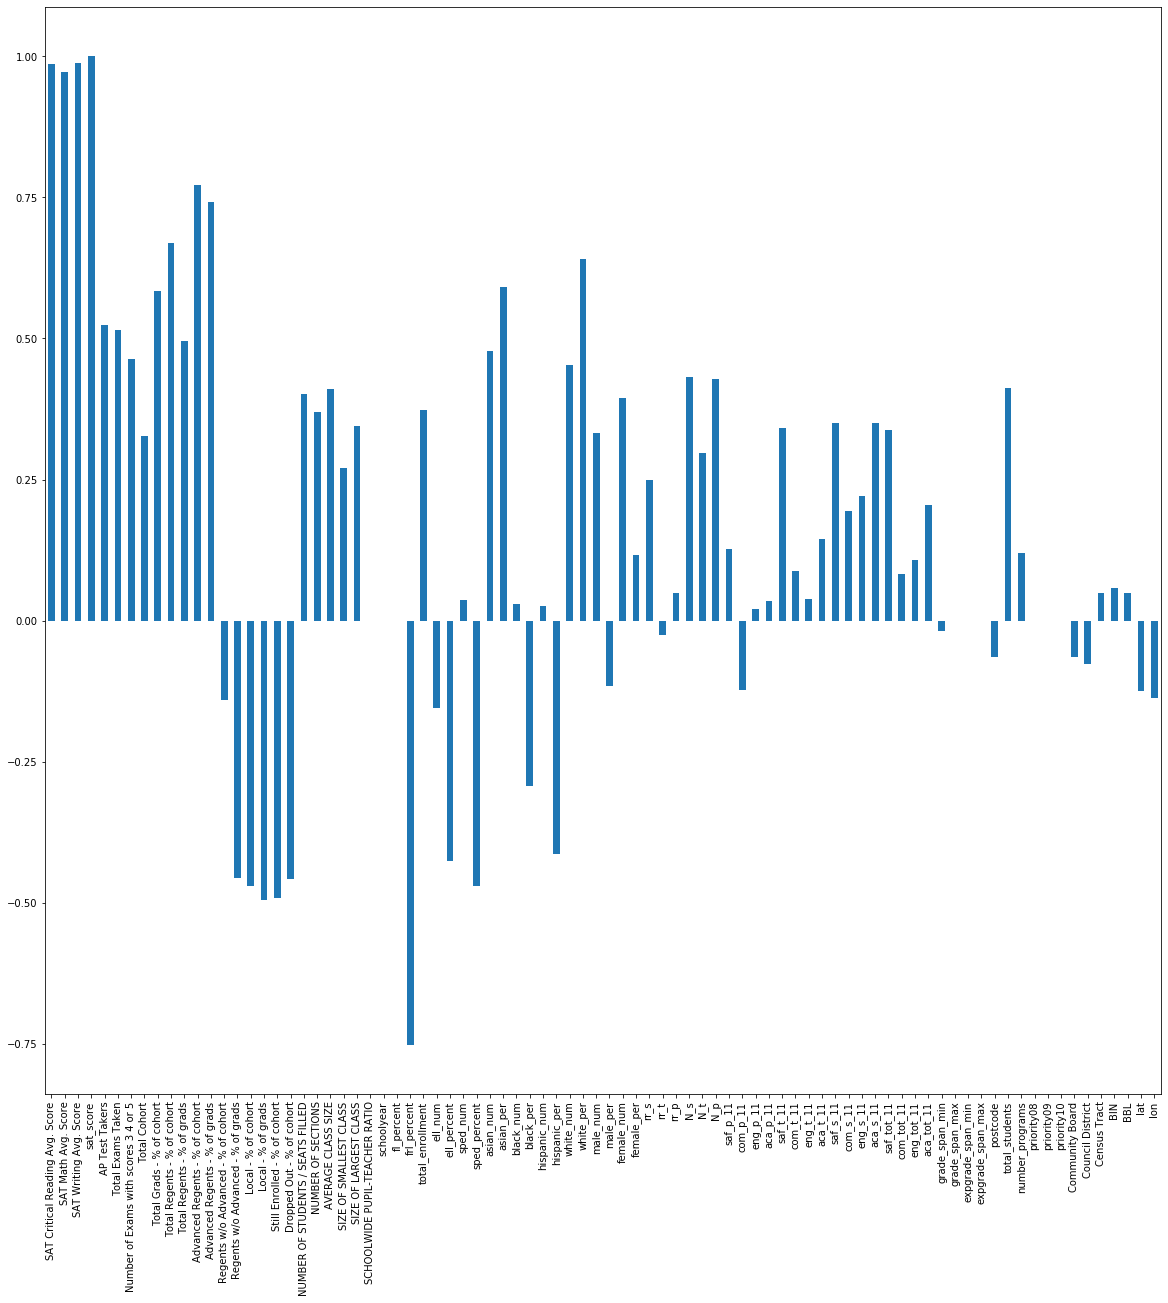

In [49]:
correlations.plot.bar(figsize = (20,20))

#### Observations:

1) total_enrollment shows correlation with SAT score despite it being counterintuitive because one would think students from smaller schools receive more attention and hence would do better.<br\>
2) Column names that are related to total_enrollment including total_students, N_s, N_p, N_t, AP Test Takers, Total Exams Taken, and NUMBER OF SECTIONS also show a positive correlation with sat_score.<br\>
3) Percentage of females(female_per) and Number of females(female_num) show positive correlation with sat_score whereas percentage of males(male_per) and number of males(male_num) show negative correlation==> results seem to suggest females do better than males.<br\>
4) Teacher and student ratings of school safety (saf_t_11, and saf_s_11) correlate with sat_score.<br\>
5) Student ratings of school academic standards (aca_s_11) correlate with sat_score, but this does not hold for ratings from teachers and parents (aca_p_11 and aca_t_11). <br\>
6) There is significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).  Whites and Asians seems to have a positive correlation whereas Blacks and Hispanics seem to have a negative correlation based on the results. <br\>
7) The percentage of English language learners at the school (ell_percent, frl_percent) has a strong negative correlation with SAT scores.

#### Observing correlation between sat_score and total_enrollment:

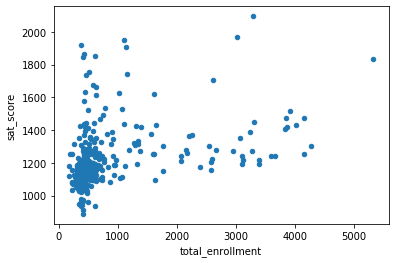

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline 

combined1.plot.scatter(x= 'total_enrollment', y='sat_score')

There does not seem to be a strong correlation as the r value suggested.  However, the points at the bottom left hand corner seem interesting and could be the reason for the high r value obtained.  To explore these points, total_enrollment<1000 and sat_score<1000:

In [51]:
bottomleft = combined.loc[combined["total_enrollment"]<1000]
bottomleft = combined.loc[combined["sat_score"]<1000]
bottomleft["School Name"]

18                                         0
19                                         0
20                                         0
31                                         0
32                                         0
33                                         0
56                                         0
57                                         0
59                                         0
73                                         0
82                                         0
90       INTERNATIONAL COMMUNITY HIGH SCHOOL
102                                        0
108                                        0
110                                        0
122                                        0
124                                        0
125          BRONX INTERNATIONAL HIGH SCHOOL
138    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
140    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
175                                        0
176                                        0
177       

The schools mentioned above upon further research show that they contain many non-English speakers learning English.  Hence, to further investigate if that is the reason why these points show a strong correlation with sat_score:

In [52]:
correlations1 = bottomleft.corr()['sat_score']
print(correlations1)

SAT Critical Reading Avg. Score        -0.985495
SAT Math Avg. Score                    -0.974561
SAT Writing Avg. Score                 -0.978365
sat_score                               1.000000
AP Test Takers                         -0.406573
Total Exams Taken                      -0.408689
Number of Exams with scores 3 4 or 5   -0.418834
Total Cohort                           -0.763907
Total Grads - % of cohort              -0.309756
Total Regents - % of cohort            -0.316008
Total Regents - % of grads             -0.149209
Advanced Regents - % of cohort         -0.528611
Advanced Regents - % of grads          -0.495750
Regents w/o Advanced - % of cohort     -0.002386
Regents w/o Advanced - % of grads       0.166971
Local - % of cohort                     0.132913
Local - % of grads                      0.149209
Still Enrolled - % of cohort            0.404423
Dropped Out - % of cohort              -0.146250
NUMBER OF STUDENTS / SEATS FILLED       0.295757
NUMBER OF SECTIONS  

We see that the correlation of sat_score with ell_percent and ell_num is very high and this is probably what influenced the correlation of total_enrollment with sat_score.  Hence, this indicates that it is actually ell_percent that is truely correlated with sat_score rather than total_enrollment.

#### Observing correlation between sat_score and ell_percent (Percentage of English Language Learners)

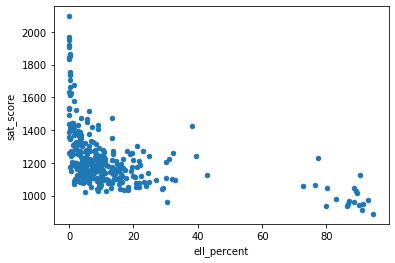

In [53]:
combined1.plot.scatter(x='ell_percent', y='sat_score')

The points at the bottom right are probably the same points from the bottom left in the previous graph.  A stronger correlation of observed between sat_score and ell_percent.  

#### Mapping out Percentage of English Language Learners by school district

The map will show us which areas of the city have a lot of English language learners.  To plot each individual school will clutter the map and hence we will plot ell_percent by district instead.  The school districts is the first 2 characters of the "DBN" value.

In [54]:
def extract2(x):
    y = str(x)
    y = y[:2]
    return y

combined2=combined
combined2["school_dist"] =combined2["DBN"].apply(extract2)
combined2 = combined2.groupby("school_dist").agg(np.mean)
combined2.reset_index(inplace=True)
combined2.head()

# from mpl_toolkits.basemap import Basemap
# m = Basemap(
#     projection='merc', 
#     llcrnrlat=40.496044, 
#     urcrnrlat=40.915256, 
#     llcrnrlon=-74.255735, 
#     urcrnrlon=-73.700272,
#     resolution='i'
# )

# m.drawmapboundary(fill_color='#85A6D9')
# m.drawcoastlines(color='#6D5F47', linewidth=.4)
# m.drawrivers(color='#6D5F47', linewidth=.4)

# longitudes = combined2["lon"].tolist()
# latitudes = combined2["lat"].tolist()
# m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined2["ell_percent"], cmap='summer')
# plt.show()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,Total Regents - % of cohort,Total Regents - % of grads,Advanced Regents - % of cohort,Advanced Regents - % of grads,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - % of cohort,Local - % of grads,Still Enrolled - % of cohort,Dropped Out - % of cohort,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO,schoolyear,fl_percent,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,saf_t_11,com_t_11,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,postcode,total_students,number_programs,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,66.416667,90.616667,15.683333,19.783333,50.733333,70.850000,4.916667,9.383333,17.833333,7.083333,115.244241,5.148538,22.675415,18.798392,26.553044,0.0,20112012.0,0.0,58.983333,668.500000,42.166667,10.000000,82.000000,17.083333,134.500000,17.516667,125.500000,22.333333,214.833333,40.733333,186.000000,18.450000,328.166667,50.050000,340.333333,49.950000,76.500000,85.333333,33.166667,525.469359,38.500000,239.166667,8.233333,7.800000,7.683333,8.016667,7.066667,6.233333,6.700000,7.500000,6.768199,6.165552,6.736444,7.446472,7.433333,6.816667,7.116667,7.683333,7.912037,12.0,0.0,12.0,10003.166667,659.500000,1.333333,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.608658,444.176397,424.814746,1142.708333,128.908454,201.516827,157.495833,158.713390,75.438767,64.151969,84.206580,17.920604,20.736157,46.220747,63.468240,11.299399,15.793420,14.794774,7.215987,149.818949,5.686360,25.038118,20.662667,28.593861,0.0,20112012.0,0.0,63.164583,605.604167,51.625000,13.006250,70.770833,13.212500,118.395833,14.479167,141.145833,24.733333,271.458333,49.554167,68.541667,10.056250,266.500000,44.718750,339.104167,55.281250,83.312500,86.416667,38.333333,495.183670,31.687500,190.000000,8.254167,7.495833,7.379167,7.704167,7.404167,6.520833,7.120833,7.564583,6.910608,6.204027,6.650389,7.384976,7.520833,6.720833,7.037500,7.541667,8.875000,12.0,0.0,12.0,10023.770833,621.395833,1.416667,0.0,0.0,0.0,4.203762,2.964120,1132.687384,1.104040e+06,1.070612e+09,40.739699,-73.991386
2,03,428.508982,437.977794,426.879491,987.583333,156.183494,244.522436,193.087500,183.496764,74.004553,63.855756,84.645805,16.386512,19.811983,47.477234,64.850316,10.140636,15.354195,15.538660,7.052405,156.005994,5.839200,23.716311,19.737593,27.122831,0.0,20112012.0,0.0,58.050000,661.416667,36.916667,9.025000,63.583333,14.500000,68.000000,6.408333,181.833333,34.000000,228.250000,44.533333,172.000000,13.725000,272.166667,47.950000,389.250000,52.050000,83.166667,80.833333,36.166667,519.250000,28.166667,206.416667,8.316667,7.541667,7.508333,7.758333,6.675000,5.991667,6.533333,6.991667,6.716667,6.258333,6.633333,7.375000,7.233333,6.616667,6.891667,7.391667,8.500000,12.0,0.0,12.0,10023.750000,717.916667,2.000000,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,397.166667,411.333333,398.666667,1207.166667,129.014423,181.685897,150.633333,123.666667,72.300000,52.750000,69.966667,13.716667,16.266667,39.033333,53.700000,19.550000,30.033333,16.983333,7.633333,143.040289,5.607065,23.832596,19.197619,27.380143,0.0,20112012.0,0.0,71.616667,589.333333,23.500000,4.950000,63.333333,14.300000,67.500000,6.30

#### Observing correlation between how students perceive safety at school (saf_s_11) and sat_score:

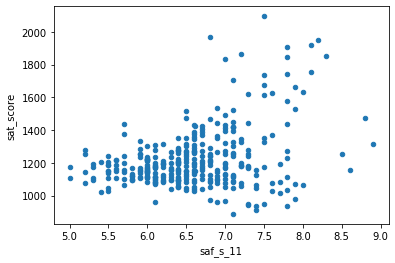

In [55]:
combined1.plot.scatter(x="saf_s_11", y="sat_score")

There appears to be a correlation between SAT scores and safety, although it isn't that strong. It looks like there are a few schools with extremely high SAT scores and high safety scores. There are a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.

#### Observing the correlation between race(white_per, asian_per, black_per, hispanic_per) and SAT score(sat_score):

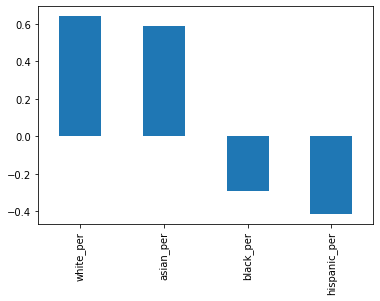

In [56]:
race_list = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined1.corr()['sat_score'][race_list].plot.bar()

It looks like a higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage of black or hispanic students correlates negatively with sat score. This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage of black or hispanic students. 

##### Exploring the negative correlation between hispanic percentage(hispanic_per) and sat_score:

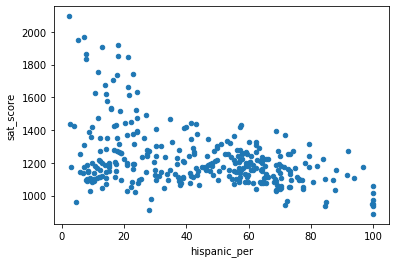

In [57]:
combined1.plot.scatter(x='hispanic_per', y='sat_score')

In [58]:
#Schools with hispanic_per>95%:

print(combined1.loc[combined1["hispanic_per"]>95, "SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
81      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
88     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
124                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
140                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
175     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
252                            MULTICULTURAL HIGH SCHOOL
285               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools listed above appear to primarily be geared towards recent immigrants to the US. These schools have a lot of students who are learning English, which would explain the lower SAT scores as seen in the bottom left of the plot above.

In [59]:
# Schools with hispanic_per<10%:

print(combined1.loc[(combined1["hispanic_per"]<10) & (combined1['sat_score']>1800), "SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
150                         BRONX HIGH SCHOOL OF SCIENCE
186                       BROOKLYN TECHNICAL HIGH SCHOOL
326    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
355                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


Many of the schools above appear to be specialized science and technology schools that receive extra funding, and only admit students who pass an entrance exam. This doesn't explain the low hispanic_per, but it does explain why their students tend to do better on the SAT -- they are students from all over New York City who did well on a standardized test.  These are the schools that feature at the top right hand corner of the plot above.

#### Determining correlation between Gender (female_per and male_per) and sat_score:

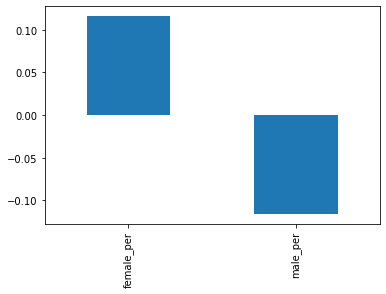

In [60]:
gender_list = ['female_per', 'male_per']
combined1.corr()["sat_score"][gender_list].plot.bar()

In the plot above, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. Neither correlation is strong.

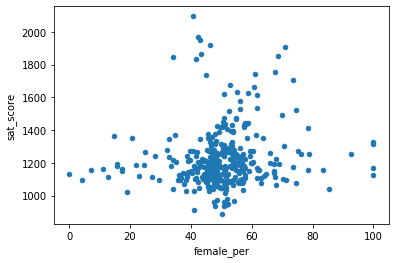

In [61]:
#Exploring scatter plot of female_per vs sat_score:

combined1.plot.scatter(x='female_per', y='sat_score')

Based on the scatterplot, there doesn't seem to be any real correlation between sat_score and female_per.

#### Observing correlation between percentage of AP Test Takers and Total enrollment:

0.06794237105459956


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


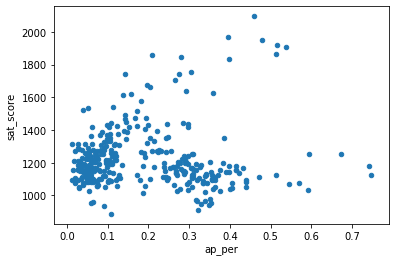

In [62]:
combined1["ap_per"] = combined1["AP Test Takers"]/combined1["total_enrollment"]
print(combined1.corr()["sat_score"]["ap_per"])
combined1.plot.scatter(x='ap_per', y='sat_score')

We see that the sat_score increases or stays the same as the ap_per increases so there seems to be a slight correlation despite the low correlation value of 0.0679.

#### Determining correlation between average class size and sat_score:

0.4110548677544271


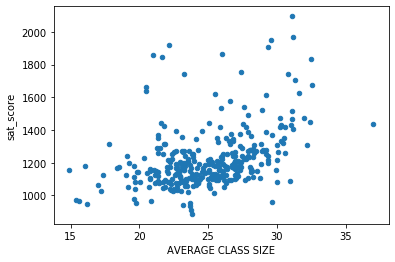

In [63]:
print(combined1.corr()['sat_score']['AVERAGE CLASS SIZE'])
combined1.plot.scatter(x='AVERAGE CLASS SIZE', y='sat_score')

Very surprisingly, there seems to be a positive correlation between class size and SAT scores. 

In [64]:
#observing the bottom left corner:  average class size<20
combined1.loc[combined1["AVERAGE CLASS SIZE"]<20, "SCHOOL NAME"]

6      47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...
8                                   ESSEX STREET ACADEMY
35                                  VANGUARD HIGH SCHOOL
55          URBAN ASSEMBLY SCHOOL FOR MEDIA STUDIES, THE
68                                 PARK EAST HIGH SCHOOL
90                   INTERNATIONAL COMMUNITY HIGH SCHOOL
105    PABLO NERUDA ACADEMY FOR ARCHITECTURE AND WORL...
107      HOLCOMBE L. RUCKER SCHOOL OF COMMUNITY RESEARCH
125                      BRONX INTERNATIONAL HIGH SCHOOL
175     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
187                   BROOKLYN INTERNATIONAL HIGH SCHOOL
207                              FRANCES PERKINS ACADEMY
237                           BROOKLYN GENERATION SCHOOL
242    HIGH SCHOOL FOR INNOVATION IN ADVERTISING AND ...
243           CULTURAL ACADEMY FOR THE ARTS AND SCIENCES
245         ACADEMY FOR CONSERVATION AND THE ENVIRONMENT
247                         EAST NEW YORK FAMILY ACADEMY
264               INTERNATIONAL

Upon looking at the bottom left hand corner, the schools mentioned here have a high percentage of english language learners.  Hence, it may just be a surprising coincidence and needs to be looked further into to see if indeed there is a correlaion.

### 6) Concluding Remarks:

Only conclusive trends we have seen are that:

1) Schools with higher white or asian percentage do better than schools with higher black or hispanic percentage.<br\>
2) How the students perceive safety positively correlates with SAT scores.<br\>
3) Increasing percentage of english language learners negatively correlates with SAT scores.<br\>
4) Class size surprisingly has a positive correlation with SAT score but the schools that scored very lowly (corresponding to a small class size) have a high amount of English-language learners or black_per or hispanic_per.  Hence this correlation could be a coincidence but needs to be further studied into.